# Test model

## Test Unet

In [ ]:
from models.Unet import *

model = simple_unet_model(256, 256, 1)
model.summary()
print('input shape:', model.input_shape)
print('output shape:', model.output_shape)

## Test DDPM

In [1]:
from util.ddpm_utils import *
from models.ddpm import *

lr = 1e-4
opt_m = tf.keras.optimizers.Adam(lr)
patch_size = 128
timesteps = 2000
timesteps_test = 200
train_steps = int(1.2e6)
ds_sample = int(1e4)
print_freq = int(1e3)
lr_change_ts = int(4e5)
img_channels = 1

/home/li52/.conda/envs/LM/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/home/li52/.conda/envs/LM/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.2 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
gamma_vec_t, alpha_vec = variance_schedule(timesteps, schedule_type='cos')
p_model, t_model = train_model((patch_size, patch_size, img_channels), img_channels)
t_model.compile(loss='mse', optimizer=opt_m)  # 用于sinus embedding的
# print(p_model.summary())  # unet
# print(t_model.summary())  # 简单的fc
print(p_model.input_shape, p_model.output_shape)
print(t_model.input_shape, t_model.output_shape)

2023-11-21 14:30:33.884076: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 14:30:34.512698: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8a:00.0, compute capability: 7.0


(None, 8, 8, 1024)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               [(None, 128, 128, 1) 0           input_1[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 128, 1) 0                   

## Test s-rBCR

In [ ]:
from models.s_rBCR import *

# Example usage:
forward_model_RDN = BCR_RDN(input_shape=(128, 128, 1), alpha=32, p=0.2, nb=3, K=12, L=12, L0=12, RDN=5)
inverse_model_RDN = inverse_RDN(alpha1=32, alpha2=4, w1=5, w2=9, Ncnn1=6, Ncnn2=5, RDN=5)

input_shape=(128, 128, 1)
inputs = Input(shape=input_shape)
x = inputs

y = forward_model_RDN(x)
z = inverse_model_RDN(y)
model = Model(inputs=inputs, outputs=z)

print(model.input_shape, model.output_shape)
print(model.summary())

## Test m-rBCR

In [1]:
from models.m_rBCR import *

# Create the full model
Nrho = 128
Ntheta = 128
input_shape = (Nrho, Ntheta, 1)

x0 = Input(shape=input_shape, name='x0_input')
x2 = Input(shape=(input_shape[0] // 2, input_shape[1] // 2, input_shape[2]), name='x2_input')
x4 = Input(shape=(input_shape[0] // 4, input_shape[1] // 4, input_shape[2]), name='x4_input')

# initialize the model

forward_model_RDN = BCR_RDN_mimo(input_shape=(128, 128, 1), alpha=32, p=0.2, nb=3, K=12, L=12, L0=12, RDN=7) 
inverse_model_RDN = inverse_RDN_mimo(input_shape=(128, 128, 1), alpha1=32, alpha2=4, w1=5, w2=9, Ncnn1=6, Ncnn2=5, RDN=7)

[y0, y2, y4] = forward_model_RDN([x0, x2, x4])
[z0, z2, z4] = inverse_model_RDN([y0, y2, y4])

model = Model(inputs=[x0, x2, x4], outputs=[z0, z2, z4])
print(model.input_shape, model.output_shape) # [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] 
print(model.summary())

/home/li52/.conda/envs/LM/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2023-11-21 14:05:11.441747: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 14:05:12.071350: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8a:00.0, compute capability: 7.0


[(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)]
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x0_input (InputLayer)           [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
x2_input (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
x4_input (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 128, 128, 1) 46531       x0_inp

# Test the train func

In [1]:
from train_mrBCR import *
train_m_rBCR()

/home/li52/.conda/envs/LM/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Test the test func

/home/li52/.conda/envs/LM/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2023-11-21 15:57:00.940015: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 15:57:01.578789: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8a:00.0, compute capability: 7.0


[(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)]
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x0_input (InputLayer)           [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
x2_input (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
x4_input (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 128, 128, 1) 46531       x0_inp

2023-11-21 15:57:04.955469: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-21 15:57:07.994638: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


finish save
finish save
test saved at: ./results/m_rBCR/


/home/li52/code/LM/m-rBCR/util/metrics.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(IMG1, IMG2, multichannel=True)
/home/li52/.conda/envs/LM/lib/python3.7/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


test performance: 22.99 0.81 0.07


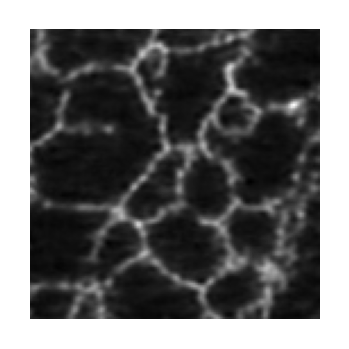

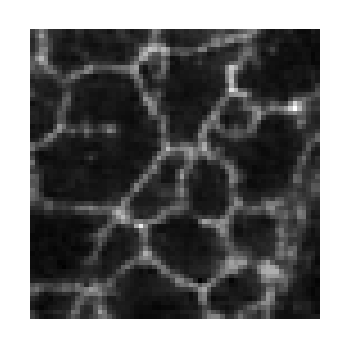

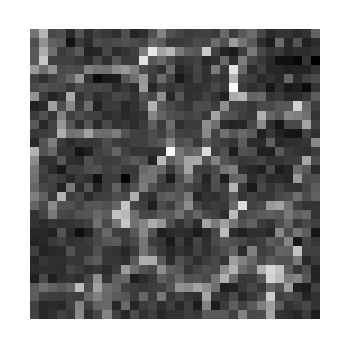

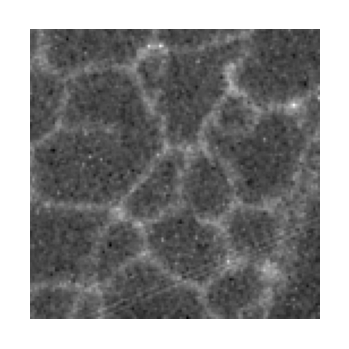

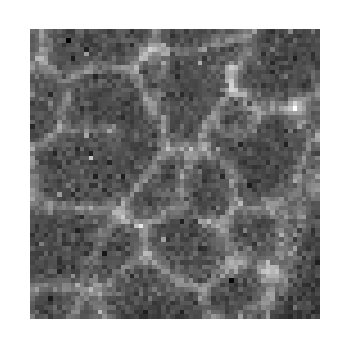

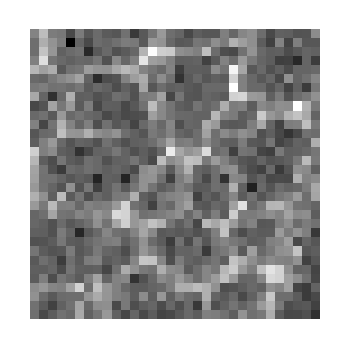

In [1]:
from test_mrBCR import *
test()